# Problem Statement

#### Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health.

## Importing the Libraries

#### About the Librarie used below
<font color="rgba(0,0,0,0.5)"><strong>Numpy</strong></font>&emsp;is useful for performing any mathematical or scientific calculation <br>
<font color="rgba(0,0,0,0.5)"><strong>Pandas</strong></font>&emsp;is Machine Learning which is used for data cleaning and analysis. It has features which are used for exploring, cleaning, transforming and visualizing from data <br>
<font color="rgba(0,0,0,0.5)"><strong>Matplotlib</strong></font>&emsp;is the popular data visualizing library <br>
<font color="rgba(0,0,0,0.5)"><strong>Seaborn</strong></font>&emsp;is also the visualization tool which provides the extended features to the matplotlib library<br>
<font color="rgba(0,0,0,0.5)"><strong>Sklearn</strong></font>&emsp;is a python library that provides wide range of machine learning algorithms <br>

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from xgboost import XGBClassifier

%matplotlib inline

warnings.filterwarnings("ignore")

### Importing the dataset for the project

#### Description of the dataset
<table style="border-style:hidden;border-collapse:collapse;">
    <tr> 
        <th>
            Attribute/Variable
        </th>
        <th>
            Description
        </th>
    </tr>
    <tr>
        <td>age</td>
        <td>Age in years</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>1 = male; 0 = female</td>
    </tr>
    <tr>
        <td>cp</td>
        <td>Chest pain type</td>
    </tr>
    <tr>
        <td>trestbps</td>
        <td>Resting blood pressure (in mm Hg on admission to the hospital)</td>
    </tr>
    <tr>
        <td>chol</td>
        <td>Serum cholesterol in mg/dl</td>
    </tr>
    <tr>
        <td>fbs</td>
        <td>Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</td>
    </tr>
    <tr>
        <td>restecg</td>
        <td>Resting electrocardiographic results</td>
    </tr>
    <tr>
        <td>thalach</td>
        <td>Maximum heart rate achieved</td>
    </tr>
    <tr>
        <td>exang</td>
        <td>Exercise induced angina (1 = yes; 0 = no)</td>
    </tr>
    <tr>
        <td>oldpeak</td>
        <td>ST depression induced by exercise relative to rest</td>
    </tr>
    <tr>
        <td>slope</td>
        <td>Slope of the peak exercise ST segment</td>
    </tr>
    <tr>
        <td>ca</td>
        <td>Number of major vessels (0-3) colored by fluoroscopy</td>
    </tr>
    <tr>
        <td>thal</td>
        <td>3 = normal; 6 = fixed defect; 7 = reversible defect</td>
    </tr>
    <tr>
        <td>target</td>
        <td>1 or 0</td>
    </tr>
</table>

In [2]:
df = pd.read_excel(r"cep1_dataset.xlsx")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.shape

(303, 14)

In [7]:
df["target"].nunique()

2

In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no missing values inthe dataset

In [10]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

#### Since the diffference between the target values is not great we can say that it is the good balanced dataset

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


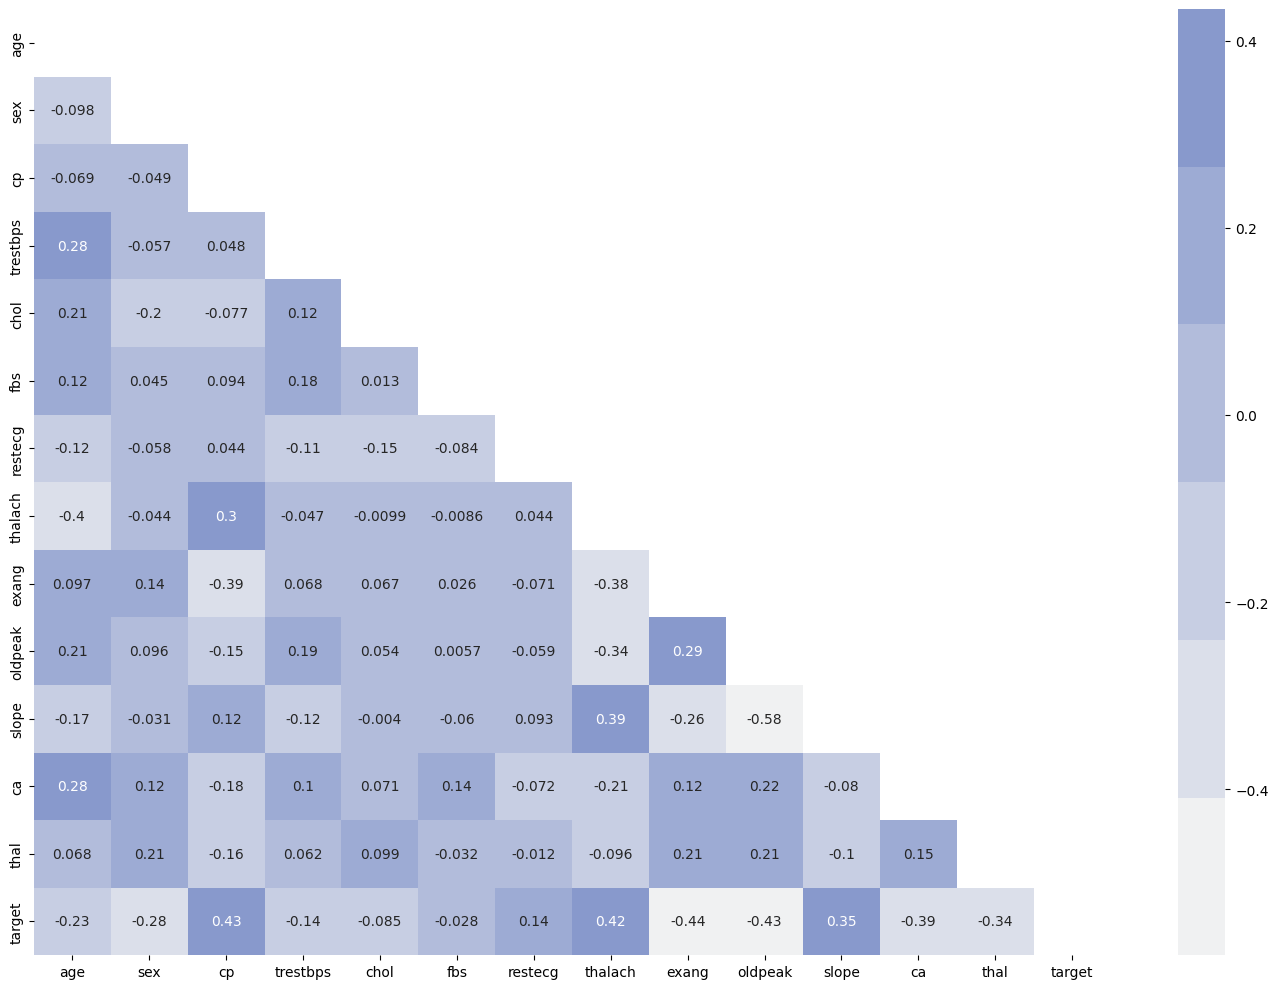

In [13]:
df_corr = df.corr()
matrix = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_corr,
    annot=True,
    # linewidth=1.5,
    xticklabels=df_corr.columns,
    yticklabels=df_corr.columns,
    mask=matrix,
    cmap=sns.light_palette("#89C"),
)

plt.tight_layout()

***There is a high positive correlation between the cp and target is high i.e., higher the chest pain higher the chance for the heart disease<br>
There is high negative correlation between the exang and the target variable ***

In [14]:
df_continuous = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_continuous

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


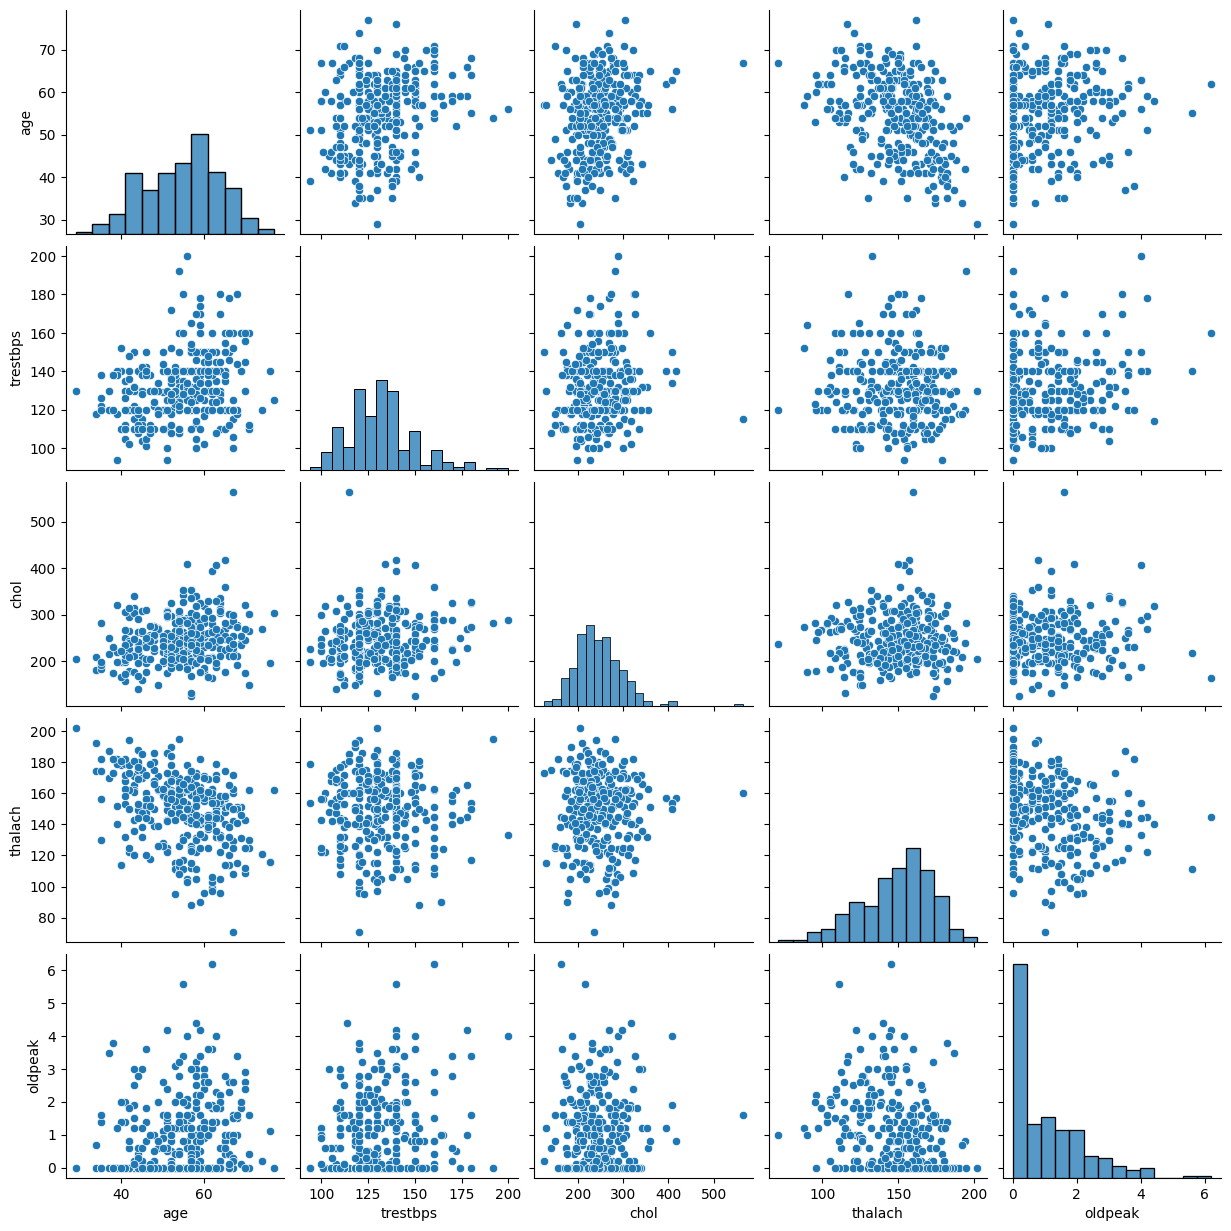

In [15]:
sns.pairplot(df_continuous)

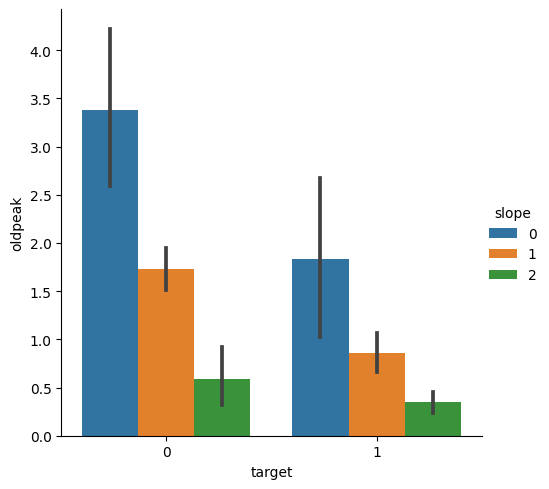

In [16]:
sns.catplot(data=df, x="target", y="oldpeak", hue="slope", kind="bar")

<Axes: xlabel='target', ylabel='oldpeak'>

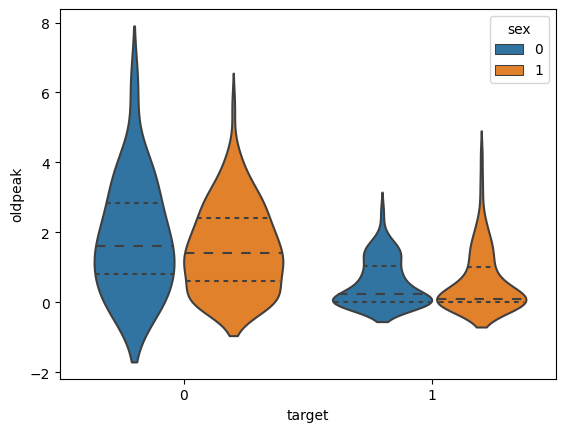

In [17]:
sns.violinplot(x="target", y="oldpeak", hue="sex", inner="quartile", data=df)

<Axes: xlabel='target', ylabel='thalach'>

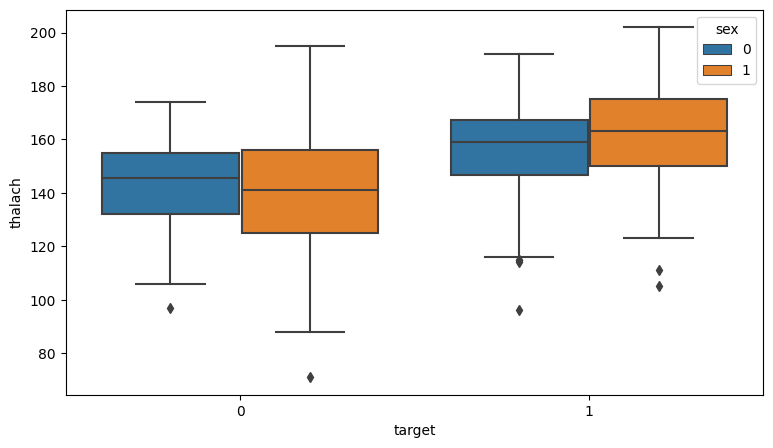

In [18]:
plt.figure(figsize=(9, 5))
sns.boxplot(x="target", y="thalach", hue="sex", data=df)

In [19]:
p_data = df[df["target"] == 1]
p_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [20]:
n_data = df[df["target"] == 0]
n_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
print("positive patients depression: {}".format(p_data["oldpeak"].mean()))
print("neagative patients depression: {}".format(n_data["oldpeak"].mean()))

positive patients depression: 0.583030303030303
neagative patients depression: 1.5855072463768116


In [22]:
print("positive patients Maximum heart rate : {}".format(p_data["thalach"].mean()))
print("neagative patients Maximum heart rate : {}".format(n_data["thalach"].mean()))

positive patients Maximum heart rate : 158.46666666666667
neagative patients Maximum heart rate : 139.1014492753623


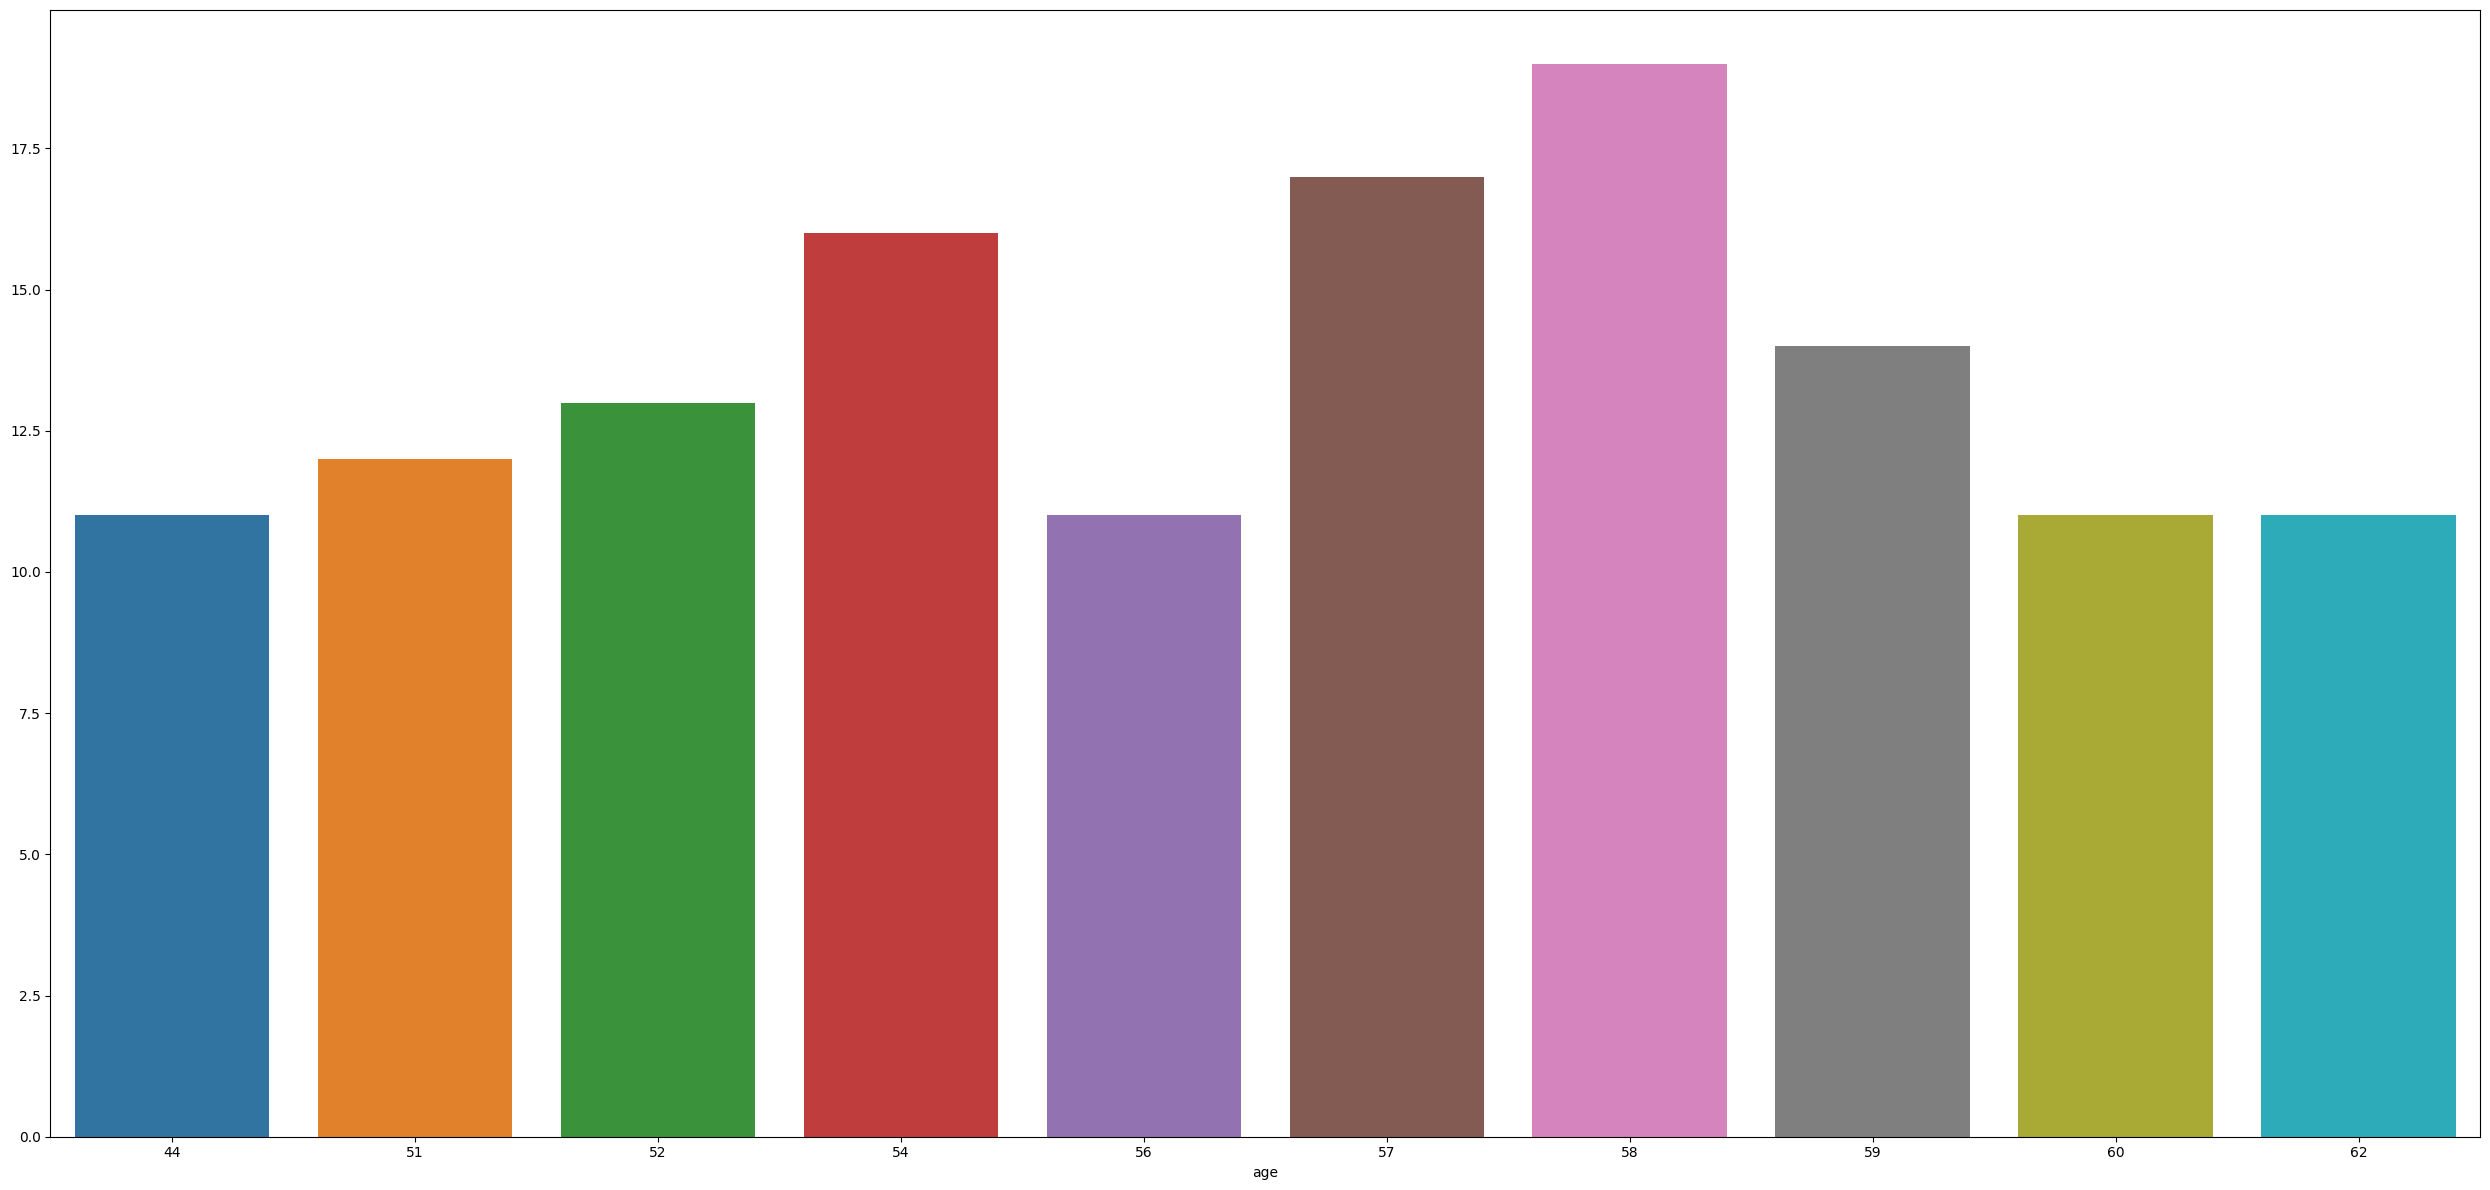

In [23]:
plt.figure(figsize=(25, 12))
sns.barplot(x=df.age.value_counts()[:10].index, y=df.age.value_counts()[:10].values)
plt.tight_layout()

## Splitting the data

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## LogisticRegression 

In [27]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [28]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [29]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred) * 100))

[[20 10]
 [ 5 26]]
Accuracy Scaore is : 75.41


## KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = knn.predict(X_test)
print(classification_report(y_test, y_pred2))

In [ ]:
print(confusion_matrix(y_test, y_pred2))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred2) * 100))

## SUPPORT VECTOR MACHINE SVC

In [ ]:
svc = SVC(random_state=1)
svc.fit(X_train, y_train)

In [ ]:
y_pred3 = svc.predict(X_test)
print(classification_report(y_test, y_pred3))

In [ ]:
print(confusion_matrix(y_test, y_pred3))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred3) * 100))

## GaussianNB(Naive bayes)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_pred4 = gnb.predict(X_test)
print(classification_report(y_test, y_pred4))

In [ ]:
print(confusion_matrix(y_test, y_pred4))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred4) * 100))

## DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [32]:
export_text(dt)

'|--- feature_2 <= -0.47\n|   |--- feature_11 <= -0.23\n|   |   |--- feature_8 <= 0.39\n|   |   |   |--- feature_12 <= 0.35\n|   |   |   |   |--- feature_7 <= -2.26\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_7 >  -2.26\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- feature_12 >  0.35\n|   |   |   |   |--- feature_6 <= -0.07\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_6 >  -0.07\n|   |   |   |   |   |--- feature_0 <= -1.47\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |--- feature_0 >  -1.47\n|   |   |   |   |   |   |--- class: 1\n|   |   |--- feature_8 >  0.39\n|   |   |   |--- feature_3 <= -1.40\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_3 >  -1.40\n|   |   |   |   |--- feature_9 <= -0.48\n|   |   |   |   |   |--- feature_4 <= -0.15\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_4 >  -0.15\n|   |   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_9 >  -0.48\n|   |   |   | 

[Text(0.5056818181818182, 0.95, 'cp <= -0.469\ngini = 0.494\nsamples = 242\nvalue = [108, 134]'),
 Text(0.2784090909090909, 0.85, 'ca <= -0.226\ngini = 0.377\nsamples = 111\nvalue = [83, 28]'),
 Text(0.17045454545454544, 0.75, 'exang <= 0.39\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.09090909090909091, 0.65, 'thal <= 0.346\ngini = 0.269\nsamples = 25\nvalue = [4, 21]'),
 Text(0.045454545454545456, 0.55, 'thalach <= -2.255\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.022727272727272728, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06818181818181818, 0.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.13636363636363635, 0.55, 'restecg <= -0.071\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.11363636363636363, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1590909090909091, 0.45, 'age <= -1.475\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.13636363636363635, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.18181818

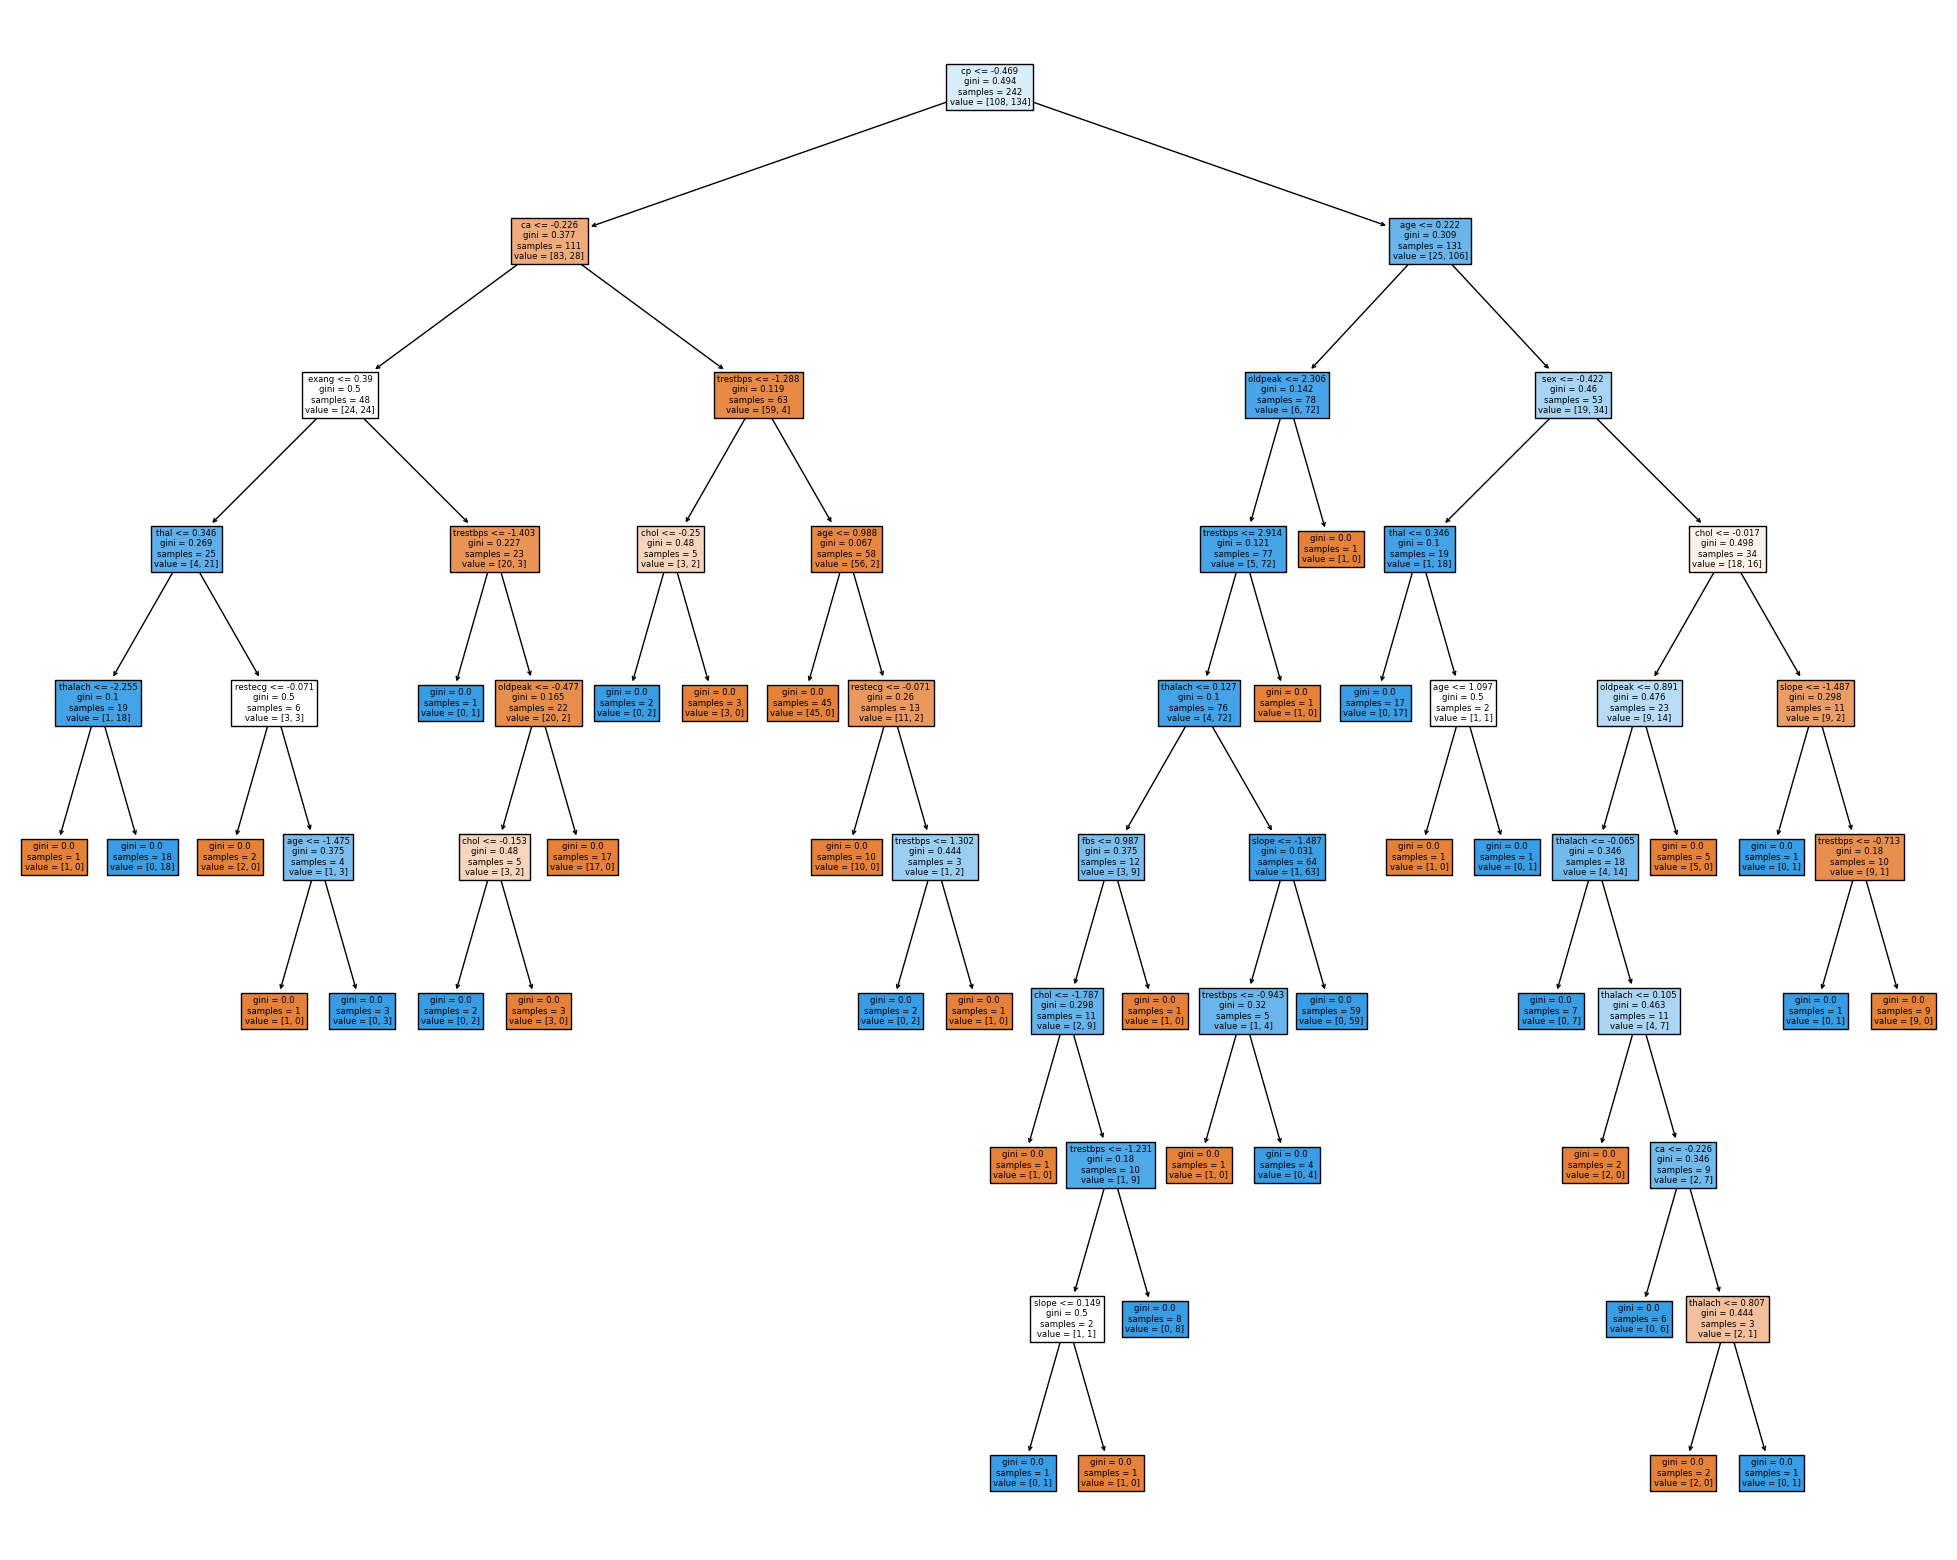

In [37]:
fig = plt.figure(figsize=(25, 20))
plot_tree(dt, feature_names=df.columns, filled=True)

In [ ]:
y_pred5 = dt.predict(X_test)
print(classification_report(y_test, y_pred5))

In [ ]:
print(confusion_matrix(y_test, y_pred5))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred5) * 100))

## RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

In [ ]:
y_pred6 = rf.predict(X_test)
print(classification_report(y_test, y_pred6))

In [ ]:
print(confusion_matrix(y_test, y_pred6))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred6) * 100))

## XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

In [ ]:
y_pred7 = xgb.predict(X_test)
print(classification_report(y_test, y_pred7))

In [ ]:
print(confusion_matrix(y_test, y_pred7))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred7) * 100))

In [ ]:
rf.feature_importances_

In [ ]:
index = df.columns[:-1]
importance = pd.Series(rf.feature_importances_, index=index)
importance.nlargest(13).plot(kind="bar", colormap="winter")